U238


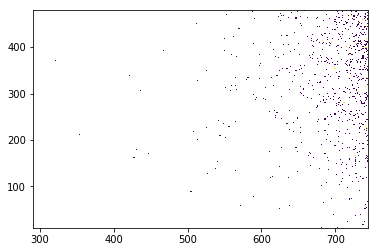

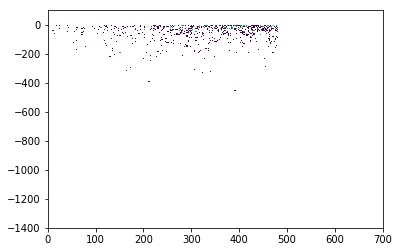

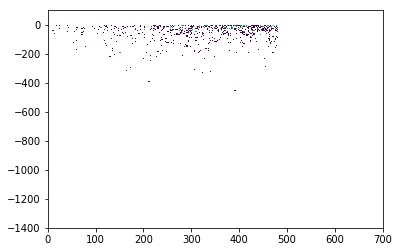

In [1]:
%run 'init.ipynb'
%run 'geometry_checks.ipynb'
%run 'functions.ipynb'

In [2]:
components = ["OuterCryostat_Elongation",
             "OuterCryostatShell", 
             "OuterCryostat_flanges",
             "SS_InnerCryostatShell",
             "SS_InnerCryostatFlanges",
             "SS_InnerCryostat_bottomDome",
             "OuterCryostatReflector",
             "SS_BellPlate",
             "SS_BellSideWall",
             "SS_BellSideWallBottomLip",
             "PmtTpc",
#              "Copper_TopRing",
#              "Teflon_Pillar_",
#              "SS_Electrodes",
#              "Teflon_BottomTPC",
#              "Teflon_TPC_Sliding",
#              "Teflon_TPC_Fixed",
#              "Copper_FieldGuard_",
#              "Copper_FieldShaperRing_",
#              "Copper_BottomPmtPlate"
             ]

DATE = 'XENONnT_2019-11-19'
DATE = "XENONnT_20191202"
isotope_array = ["U238",
                "Co60",
                "K40",
                "Cs137",
                "Th228",
                "U235",
                "Th232",
                "Ra226"
                ]
num_file = "FINAL"
# num_file = str(1)

In [3]:
N = 100000000
m_fv = 4 #tons

In [4]:
def calculate_events(data, isotope):
    ss = single_scatter(data)
    fv_ = fv(ss)
    energy_ = energy(fv_, 1, 12)
    #en = select_typepri(energy_, isotope)
    #events_df = pd.DataFrame()
    #events_df = pd.concat([events_df, en])
    events_passing = len(energy_)
    if events_passing ==0:
        en_enlarged = energy(fv_, 1, 100)
        events_passing = (len(en_enlarged)*11)/99
        if events_passing == 0:
            events_passing = 2.3
    return events_passing

In [7]:
def add_var(data):
    data['rp'] = np.sqrt(data.xp**2+ data.yp**2)
    #data['r2p'] = data.rp*data.rp
    data['R'] = np.sqrt(data.X**2+ data.Y**2)
    #data['R2'] = (data.R*data.R)
    return data

def get_xyz(rootfile):
    dataframe = []
    count=0
    for df in tqdm(read_root(rootfile, chunksize=100000,
                             columns= ["xpri", "ypri", "zpri", "epri", "ns", "X", "Y", "Z", "Ed"],
                            where="ns==1"), unit = "chunks"):
        #if count==1:
        #    break
        x_values=[x[0] for x in df.X]
        y_values=[y[0] for y in df.X]
        z_values=[z[0] for z in df.X]
        df["X"]=x_values
        df["Y"]=y_values
        df["Z"]=z_values
        dataframe.append(df)
        count+=1
    dataframe=pd.concat(dataframe)
    dataframe.columns = ['xp', 'yp', 'zp_uc', "epri", "ns", "X", "Y", "Z_uc", "Ed"] #rename 
    offset = 1488/2
    dataframe['rp'] = np.sqrt(dataframe.xp**2+ dataframe.yp**2)
    dataframe['r2p'] = dataframe.rp*dataframe.rp
    dataframe['R'] = np.sqrt(dataframe.X**2+ dataframe.Y**2)
    dataframe['R2'] = (dataframe.R*dataframe.R)
    dataframe['Z'] = dataframe.Z_uc+offset
    dataframe['zp'] = dataframe.zp_uc+ offset
    print(type(dataframe))
    return dataframe



In [8]:
material = "SS_BellPlate"
isotope = "U235"
rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
print(rootfile)
data_jp = get_xyz(rootfile)
print(type(data_jp))
print(data_jp.columns)
data_jp = add_var(data_jp)


0chunks [00:00, ?chunks/s]

/dali/lgrandi/xenonnt/simulations/er_simulations/final_files/SS_BellPlate/U235/output_SS_BellPlate_U235_FINAL_Sort.root


6chunks [00:02,  2.34chunks/s]


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index(['xp', 'yp', 'zp_uc', 'epri', 'ns', 'X', 'Y', 'Z_uc', 'Ed', 'rp', 'r2p',
       'R', 'R2', 'Z', 'zp'],
      dtype='object')


In [9]:
data_jp

,xp,yp,zp_uc,epri,ns,X,Y,Z_uc,Ed,rp,r2p,R,R2,Z,zp
0,319.342255,315.740601,238.195602,0.0,1,335.856873,335.856873,335.856873,[319.15506],449.078613,201671.593750,474.973344,225599.677690,1079.856873,982.195602
1,-680.479736,-5.163789,235.604645,0.0,1,-176.950806,-176.950806,-176.950806,[296.5712],680.499329,463079.343750,250.246229,62623.175250,567.049194,979.604645
2,297.338013,-177.005524,234.575348,0.0,1,136.171524,136.171524,136.171524,[260.60266],346.035889,119740.835938,192.575616,37085.367923,880.171524,978.575348
3,64.959045,-149.271973,238.148987,0.0,1,-70.798347,-70.798347,-70.798347,[210.1789],162.793732,26501.798828,100.123983,10024.812010,673.201653,982.148987
4,-166.846878,-156.301376,234.290619,0.0,1,-282.015717,-282.015717,-282.015717,[94.53587],228.621964,52268.003906,398.830451,159065.728766,461.984283,978.290619
5,-311.309692,-246.108292,236.257401,0.0,1,-414.753632,-414.753632,-414.753632,[351.16208],396.841309,157483.031250,586.550211,344041.149837,329.246368,980.257401
6,164.180283,-110.776665,235.282211,0.0,1,413.993683,413.993683,413.993683,[134.55988],198.057144,39226.632812,585.475481,342781.538898,1157.993683,979.282211
7,164.180283,-110.776665,235.282211,0.0,1,89.995087,89.995087,89.995087,[214.1684],198.057144,39226.632812,127.272272,16198.231249,833.995087,979.282211
8,209.869263,137.707947,236.298737,0.0,1,236.260956,236.260956,236.260956,[147.91],251.015106,63008.582031,334.123448,111638.478481,980.260956,980.298737
9,-425.281158,148.383499,235.871536,0.0,1,-352.671844,-352.671844,-352.671844,[238.62923],450.423920,202881.703125,498.753306,248754.859781,391.328156,979.871536


In [ ]:
material = "SS_InnerCryostat"
isotope = "U238"
name = ("%s_%s"%(material, isotope))
from tqdm import tqdm
def get_file(name): 
    # process df here
    df = pd.read_hdf(name)
    return data

df = get_file(name)
df.head()
#for isotope in isotope_array:

In [ ]:
data = pd.read_hdf("PmtTpc_Ra226")
data.head()

In [ ]:
def get_data(isotope, component, N):
    df = pd.DataFrame()
    if component == "OuterCryostatShell":
        DATE = "XENONnT_20191202"
        material = "SS_OuterCryostat" 
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        df = shell
        frac = fraction_shell
    elif component == "OuterCryostat_Elongation":
        DATE = "XENONnT_20191202"
        material = "SS_OuterCryostat"
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        df = elongation
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        frac = fraction_elong 
    elif component == "OuterCryostat_flanges":
        DATE = "XENONnT_20191202"
        material = "SS_OuterCryostat"
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        flanges = pd.concat([flange1, flange2, flange3])
        df = flanges
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        frac = fraction_flanges
    elif component == "SS_InnerCryostatShell":
        material = "SS_InnerCryostat" 
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        flanges_in = pd.concat([flange1_in, flange2_in, flange3_in])
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        df = shell_in
        frac = fraction_shell
    elif component == "SS_InnerCryostatFlanges":
        material = "SS_InnerCryostat" 
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        flanges_in = pd.concat([flange1_in, flange2_in, flange3_in])
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        df = flanges_in
        frac = fraction_flanges
    elif component == "SS_InnerCryostat_bottomDome":
        material = "SS_InnerCryostat" 
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        flanges_in = pd.concat([flange1_in, flange2_in, flange3_in])
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        frac = fraction_elong
        df = elongation_in
    elif component == "SS_BellSideWall":
        material = 'SS_BellSideWall'
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        bottomLip, bellWall = divide_bellWall(data)
        fraction_side, fraction_lip = bell_wall_numbers(N)
        frac = fraction_side
        df = bellWall
    elif component == "SS_BellSideWallBottomLip":
        material = 'SS_BellSideWall'
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        bottomLip, bellWall = divide_bellWall(data)
        df = bottomLip 
        fraction_side, fraction_lip = bell_wall_numbers(N)
        frac = fraction_lip
    elif component == "SS_Electrodes":
        material = 'SS_AnodeRing'
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        frac = 1
    elif component == "Top_PTFE_Frame":
        material = 'SS_Teflon_TopElectrodesFrame'
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        data = get_xyz(rootfile)
        frac = 1
    elif component ==  "Teflon_TPC_Sliding":
        DATE = "XENONnT_20191202"
        material = "Teflon_TPC"
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        df = get_xyz(rootfile)
        frac = 1
    elif component ==  "Teflon_TPC_Fixed":
        DATE = "XENONnT_20191202"
        material = "Teflon_TPC"
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        df = get_xyz(rootfile)
        frac = 1
    else:
        material = component
        rootfile = '/dali/lgrandi/xenonnt/simulations/er_simulations/final_files' + '/'+ material + '/' + isotope + '/' + 'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
        df = get_xyz(rootfile)
        frac = 1
    return df, frac

In [ ]:
data, fr = get_data("U238", "OuterCryostatShell", 1000)
data.head()
print(len(data))

In [ ]:
def do(component, m_fv): 
   
    conv = 3.15*1e7
    rate_array = []
    error_array = []
    i = 0
    flag = 0
    total_str = ""  
    E = 11
    time_array = []
    
    for i in range(0, len(isotope_array)):
        isotope = isotope_array[i]
        data, frac = get_data(isotope, component, N)
        
        #n = select_typepri(data, isotope)-------> in case other type pri function 
        b = select_typepri(data, isotope) #later on with the good function
        n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
        n_events = calculate_events(data, isotope)
        p = get_parameters(component)
        mass = p['mass']
        contamination = p[isotope] 
        err = "err_"+isotope
        err = str(err)
        error_cont = p[err]/1000
        
        if (contamination == 0):
            rate = 0
            error_rate = 0
            str_ = ( "| no contamination value ")
            alpha = 0
            time = 0

        else:
            contamination = p[isotope]/1000 
            time = n / (mass * contamination)
            rate = n_events/(time * m_fv ) #*E  #ev/s*t
            alpha = mass / (m_fv * n) #correct with mass*b/(m_fv*E*N_gen)  ##no energy  
            err = "err_"+isotope
            err = str(err) 
            error_rate = alpha * np.sqrt((n_events * error_cont)**2 + (contamination*np.sqrt(n_events))**2)
            if n_events == 2.3: 
                str_ = ("|<%4.4f" %(rate*conv))
                flag = flag +1
            else:
                str_ = ("|(%4.4f +- %4.4f)" %(rate*conv, error_rate*conv))
            
        rate_array = np.append(rate_array, rate)
        error_array = np.append(error_array, error_rate) 
        total_str = total_str  + str_ 
        
        if time == 0:
            time_array = time_array = np.append(time_array, time)  
        else:
            time_array = time_array = np.append(time_array, time/conv)
        
        i = i+1 
        tot_rate = 0
        tot_error_rate = 0
        if len(rate_array)!=0:
            for i in range(0, len(rate_array)):
                tot_rate = tot_rate + rate_array[i]
                tot_error_rate = tot_error_rate + error_array[i]
                if flag == 0:
                    total_rate_string = ("|(**%4.4f +- %4.4f)" %(tot_rate*conv, tot_error_rate*conv)+ "**|" )
                else:
                    total_rate_string = ("|**<%4.4f " %(tot_rate*conv)+ "**|") 
        else:
            total_rate_string = "|"        
    print("|" + component + total_str + total_rate_string)
    return tot_rate*conv, time_array
    
####################################################################################

In [ ]:
data, fr = get_data("U238", "Copper_TopRing", 1000)
do("Copper_BottomPmtPlate", 4)
# print(time)
# type(time)

In [ ]:
isotope_array = ["U238",
                "Co60",
                "K40",
                "Cs137",
                "Th228",
                "U235",
                "Th232",
                #"Ra226"
                ]
components = ["OuterCryostat_Elongation",
             "OuterCryostatShell",
             "OuterCryostat_flanges",
             "SS_InnerCryostatShell",
             "SS_InnerCryostatFlanges",
             "SS_InnerCryostat_bottomDome",]
# dict_times = {
#         "isotope_string" : "U238 ^ Co60 ^ K40 ^ Cs137 ^ Th228 ^ U235 ^ Th232 ^ Ra226"
#     }
def print_results(m_fv):
    total_rate = []
    times = []
    print("^material ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^ Tot ^", )
    for component in components:
        tot_rate_per_comp, time = do(component, m_fv)
        total_rate = np.append(total_rate, tot_rate_per_comp)
#        dict_ = {component : time}
#        dict_times.update(dict_)
#     return dict_times
    print("^Tot.^^^^^^^^^", "%4.4f" %(sum(total_rate)), "ev/t*y^")     

print_results(m_fv) 
# print(dict_times)

In [ ]:
###plot spectrum per component 
def plot_spectrum(data, min,max, bins, isotope, time):
    time_weights = [1/time]*len(data)
    plt.hist(data.Ed, bins = bins, range = (min, max), weights = time_weights, histtype = 'step', label = isotope)
    plt.ylabel('log(counts)')
    plt.xlabel('Ed [keV]')
    plt.yscale('log')
    plt.tight_layout()
    plt.legend()
    
for component in components:
    print("working on:" , component)
    for i in range(0, len(isotope_array)):
        isotope = isotope_array[i]
        data, frac = get_data(isotope, component, N)
        b = select_typepri(data, isotope) #later on with the good function
        n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
        p = get_parameters(component)
        mass = p['mass']
        contamination = p[isotope] 
        if contamination > 0:
            contamination = p[isotope]/1000 
            time = n / (mass * contamination)
        else:          
            print("no contamination")
        
        plot_spectrum(data, 0, 3500, 300, isotope, time) 
    plt.show()

In [ ]:
# plot spectrum per material 

def plot_total_contribution(bins, min_val, max_val ):
    conv = 3.15*1e7 #sec->year
    bins_ = bins 
    min_ = min_val
    max_ = max_val
    values = np.zeros(bins) 
    for component in components:
        print("working on:" , component)
        for i in range(0, len(isotope_array)):
            n =0
            isotope = isotope_array[i]
            data, frac = get_data(isotope, component, N)
            b = select_typepri(data, isotope) #later on with the good function
            n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
            p = get_parameters(component)
            mass = p['mass']
            contamination = p[isotope] 
            if contamination > 0:
                contamination = p[isotope]/1000 
                time = n / (mass * contamination)
            else:          
                print("no contamination for ", isotope)
            time_weights = [1/time]*len(data)
            n, bins_plt, _ = plt.hist(data.Ed, bins = bins_, range = (min_, max_), weights = time_weights, 
                                      histtype = "step", label = ("%s %s"%(component, isotope)))            
            #plt.yscale("log") 
            values = values+n 
    return values, bins_plt


values, bins_plt = plot_total_contribution(300, 0, 500 )
plt.plot(bins_plt[:-1], values, "black", label = "tot")
plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.yscale("log")
plt.ylabel("rate")

plt.xlabel("Energy [keV]")
plt.title("ER from materials")
plt.show() 

In [ ]:
def plot_total_contribution(bins, min_val, max_val ):

    bins_ = bins 
    min_ = min_val
    max_ = max_val
    values = np.zeros(bins) 
    for component in components:
        print("working on:" , component)
        for i in range(0, len(isotope_array)):
            isotope = isotope_array[i]
            data, frac = get_data(isotope, component, N)
            b = select_typepri(data, isotope) #later on with the good function
            n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
            p = get_parameters(component)
            mass = p['mass']
            contamination = p[isotope] 
            if contamination > 0:
                contamination = p[isotope]/1000 
                time = n / (mass * contamination)
            else:          
                print("no contamination for ", isotope)
            time_weights = [1/time]*len(data)
            n, bins_plt, = np.histogram(data.Ed, bins = bins_, range = (min_, max_), weights = time_weights)            
            plt.yscale("log")              
            values = values + n
    return values, bins_plt

conv = 3.15*1e7
for i in range (0, len(values)):
    values[i] = values[i]*conv
values, bins_plt = plot_total_contribution(300, 0, 2500 )
plt.plot(bins_plt[:-1], values, "black", label = "tot")
plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-large')
plt.yscale("log")
plt.ylabel("rate [ev*y]ls")

plt.xlabel("Energy [keV]")
plt.title("ER from materials")
plt.show() 

In [ ]:
components = ["OuterCryostat_Elongation",
             "OuterCryostatShell", 
             "OuterCryostat_flanges",
             "SS_InnerCryostatShell",
             "SS_InnerCryostatFlanges",
             "SS_InnerCryostat_bottomDome",
             "OuterCryostatReflector",
             "SS_BellPlate",
             "SS_BellSideWall",
             "SS_BellSideWallBottomLip",
             "PmtTpc",
              "Copper_TopRing",
              "Copper_LowerRing",
              "Teflon_Pillar_",
              "SS_Electrodes",
              "Teflon_BottomTPC",
              "Teflon_TPC_Sliding",
              "Teflon_TPC_Fixed",
              "Copper_FieldGuard_",
              "Copper_FieldShaperRing_",
              "Top_PTFE_Frame",
              "Copper_BottomPmtPlate",
             "Copper_TopPmtPlate"]

DATE = 'XENONnT_2019-11-19'
DATE = "XENONnT_20191202"
isotope_array = ["U238",
                "Co60",
                "K40",
                "Cs137",
                "Th228",
                "U235",
                "Th232",
                "Ra226"
                ]
def only_cont(component, m_fv): 
    p = get_parameters(component)
    screen_id = (p["ids"])
    total_str = ("|%s" %screen_id)
    for i in range(0, len(isotope_array)):
        isotope = isotope_array[i]
        
        mass = p['mass']
        contamination = p[isotope] 
        err = "err_"+isotope
        err = str(err)
        error_cont = p[err]
        contamination = p[isotope]
        if (contamination == 0):
            str_ = ("|<color #ed1c24>no contamination value</color>")
        else:
            str_ = ("|%2.2f  +- %2.2f" %(contamination, error_cont))
        total_str = total_str  + str_ 
               
    print("|" + component + total_str + "|")

def print_cont(m_fv):
    print("^material ^ screening_id ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^", )
    for component in components:
        only_cont(component, m_fv)

print_cont(m_fv)     